SG (SynthHD)の信号をスペアナMs2720tで取得する例。SGがUSB接続されているHostで実行する。Ms2720tは社内ネットワークにつながっている想定。また，SGの２出力はコンバイナでマージされMs2720tに入力されているとする。

In [1]:
from quel_inst_tool import InstDevManager,Ms2720t,Ms2720tTraceMode,SpectrumAnalyzer,SynthHDMaster,SynthHDSweepParams
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
SynthHD = SynthHDMaster() 
im = InstDevManager(ivi="@py",blacklist="ASRL/dev/ttyACM0::INSTR")  # 必ず必要。スペアナのInstDevManagerがSGを認識して取り込んでしまうとSGの値がおかしくなる。
dev = im.lookup(prod_id="MS2720T")
ms2720t = Ms2720t(dev)

SGの出力設定

In [3]:
SynthHD.channel[0].frequency = 1e10  # CH[0] = RFOUTA の周波数。単位はHzで設定
SynthHD.channel[1].frequency = 8e9  # CH[1] = RFOUTB の周波数。単位はHzで設定
SynthHD.channel[0].power = -20  # CH[0] = RFOUTA の出力パワー。単位はdBmで設定
SynthHD.channel[1].power = -30  # CH[1] = RFOUTB の出力パワー。単位はdBmで設定

SynthHD.channel[0].enable = True  # CH[0] = RFOUTA の出力オン
SynthHD.channel[1].enable = True  # CH[1] = RFOUTB の出力オン


In [4]:
ms2720t.continuous_sweep = False  #連続sweep状態をstop
ms2720t.trace_mode = Ms2720tTraceMode.NORM  # 1sweep データ取得するときのTrace Modeの設定
ms2720t.freq_range_set(9e9, 5e9)  # freq_range_setの第１引き数は中心周波数で，第２はスパンです。
ms2720t.resolution_bandwidth = 1e5
ms2720t.average_enable = False  # 1sweep data の時はaverage_enableをFalseにしてください。　
fd, pk = ms2720t.trace_and_peak_get(minimum_power=-40.0)  # 引き数のminimum powerはpeak探索時にそれ以下のpeakは無視するという意味です。

8 GHz 10 GHzのピークがあるので，ピークの数は二つになっています。

In [5]:
len(pk)

2

周波数の低い順に，[[周波数(Hz),出力(dBm)],...]と並びます。

In [6]:
pk

array([[ 8.00000000e+09, -3.47600000e+01],
       [ 1.00090909e+10, -2.50800000e+01]])

最後に取得したトレースをプロットします。

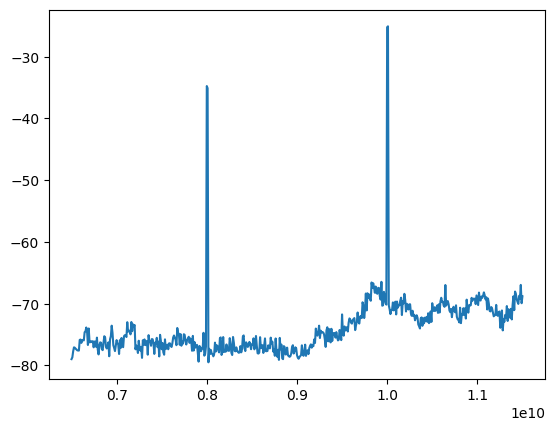

In [7]:
plt.plot(fd[:, 0], fd[:, 1])  # 取得Traceのプロット